<a href="https://colab.research.google.com/github/Favisoki/hdsc-2021/blob/main/HDSC_2_StageB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
d_frame=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
# print the first five rows
d_frame.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
 #rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area', 'X3':  'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height','X6': 'Orientation', 'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distribution', 'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}
 
df=d_frame.rename(columns=column_names)
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
# get descriptive statistics of the data
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
#select a sample of the dataset
lin_reg_df = df[['Relative_Compactness','Cooling_Load']].sample(40, random_state=1)

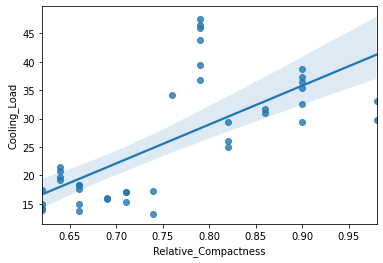

In [ ]:
#regression plot
sns.regplot(x="Relative_Compactness", y="Cooling_Load", data=lin_reg_df)

## DATA PREPROCESSING

In [ ]:
#Firstly the dataset is normalised to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
# create a new dataframe for the normalized data
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# copy out the features by dropping the labels
features = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])

# grab the label
target = normalised_df['Heating_Load']

In [ ]:
#the dataset is then split into training and testing dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
 
# do the magic of splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)

# initialize the model (P.S: it's just a simple linear regression)
linear_model = LinearRegression()

#fit the model to the *training* data
linear_model.fit(x_train, y_train)

#make predictions
predicted_values = linear_model.predict(x_test)

#lets see what we predicted
print('-------' * 20)
print('Our first 20 predictions: \n', predicted_values[:20])

--------------------------------------------------------------------------------------------------------------------------------------------
Our first 20 predictions: 
 [0.17858887 0.5814209  0.75366211 0.71948242 0.76416016 0.24719238
 0.16015625 0.61010742 0.25488281 0.54199219 0.32104492 0.66760254
 0.69421387 0.30761719 0.18518066 0.7166748  0.56555176 0.31433105
 0.25610352 0.74621582]


In [ ]:
normalised_df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085


# Model testing

## Now let's see how well our model does
### Can we really trust what it tells us?
#### Let's find out...............

In [ ]:
# We'll use the metric MAE (Mean Absolute Error)
# first import the metric
from sklearn.metrics import mean_absolute_error

#find the metric and store ina avariable
mae = mean_absolute_error(y_test, predicted_values)

print('Mean Absolute Error of our model: ', round(mae, 3))

Mean Absolute Error of our model:  0.063


In [ ]:
# Now we'll use a metric called the r2 score
# first import the metric 
from sklearn.metrics import r2_score

# then find the metric and store ina avariable
r2_score = r2_score(y_test, predicted_values)
print('R2_Score of the model: ', round(r2_score,3))

R2_Score of the model:  0.893


In [ ]:
# the residual sum of squares value
rss = np.sum(np.square(y_test - predicted_values))

print('Residual sum of squares of the model: ', round(rss, 3))

Residual sum of squares of the model:  1.823


In [ ]:
# the mean squared error
from sklearn.metrics import mean_squared_error

# find the metric and store ina avariable
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
print('The Mean Squared Error of our model: ', round(rmse, 3))

The Mean Squared Error of our model:  0.089


# Qualitataive Data Analysis
## Plotting

In [ ]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


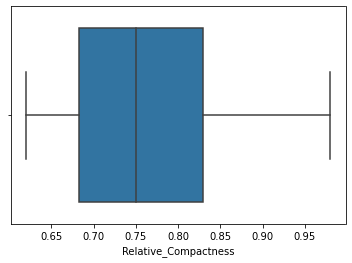

In [ ]:
# a countplot showing the distribution of the Relative Compactness
sns.boxplot(x='Relative_Compactness', data=df)

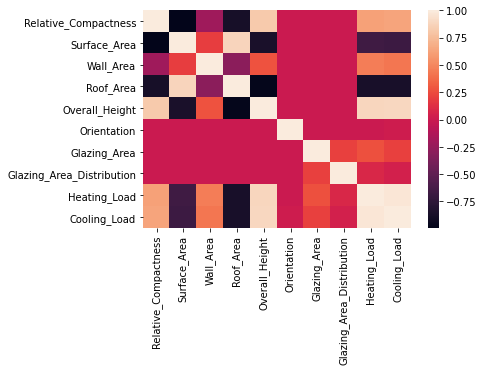

In [ ]:
# get a correlation matrix for the data
corr = df.corr()
sns.heatmap(corr)

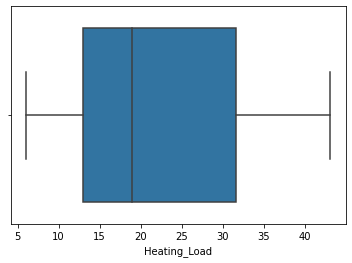

In [ ]:
# a countplot showing the distribution of the Heating Load
sns.boxplot(x='Heating_Load', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


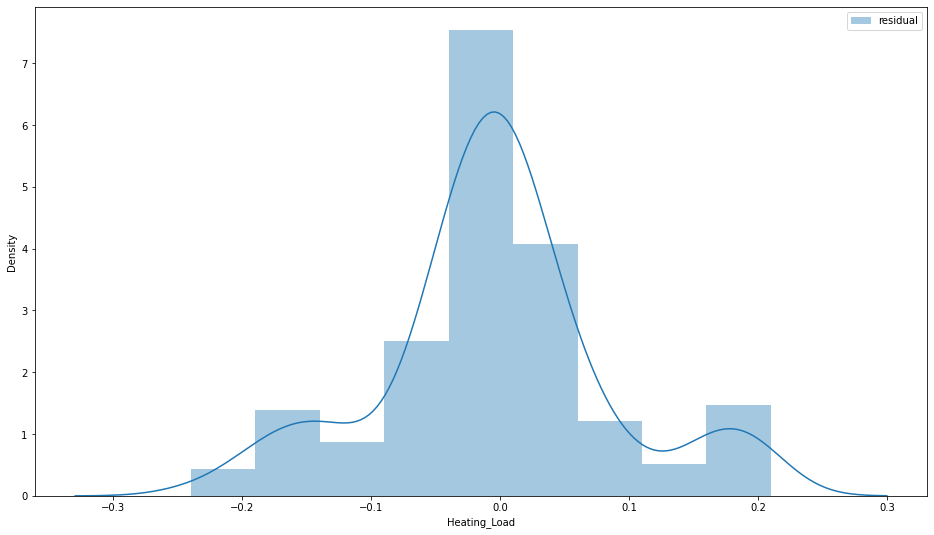

In [ ]:
g = y_test - predicted_values
plt.figure(figsize=(16, 9))
sns.distplot(g, bins=9, label="residual")
plt.legend()

### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
R_reg = Ridge(alpha=0.5)
R_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
L_reg = Lasso(alpha=0.001)
L_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

## Comparing the effects of regularization

In [ ]:
# define a function that returns the weight of every faeture
def get_weights_df(model, feat, col_name):
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights = get_weights_df(R_reg, x_train, 'Ridge_Weight')
lasso_weights = get_weights_df(L_reg, x_train, 'Lasso_Weight')

final_weights = pd.merge(linear_weights, ridge_weights, on='Features')
final_weights = pd.merge(final_weights, lasso_weights, on='Features')

In [ ]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,Surface_Area,-6.387091e+12,-0.062275,0.000000
1,Relative_Compactness,-6.064125e-01,-0.283471,-0.027719
2,Orientation,-2.822876e-03,0.003369,0.000000
3,Glazing_Area_Distribution,1.913548e-02,0.029088,0.021431
4,Glazing_Area,2.295933e-01,0.212449,0.206132
5,Overall_Height,3.852539e-01,0.442467,0.463482
6,Wall_Area,3.725803e+12,0.103061,0.200087
7,Roof_Area,4.790318e+12,-0.163192,-0.000000
